##### Apply IQR on CA housing dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

In [2]:
# Load California housing dataset
data = fetch_california_housing()
X, feature_names = data.data, data.feature_names

In [3]:
# Convert to DataFrame for better handling
housing_df = pd.DataFrame(X, columns=feature_names)

In [4]:
# Calculate quartiles and IQR for each column
Q1 = housing_df.quantile(0.25)
Q3 = housing_df.quantile(0.75)
IQR = Q3 - Q1

In [5]:
# Establish lower and higher cutoffs
lower_cutoff = Q1 - 1.5 * IQR
upper_cutoff = Q3 + 1.5 * IQR

In [6]:
# Extract outliers for each column
outliers = ((housing_df < lower_cutoff) | (housing_df > upper_cutoff))

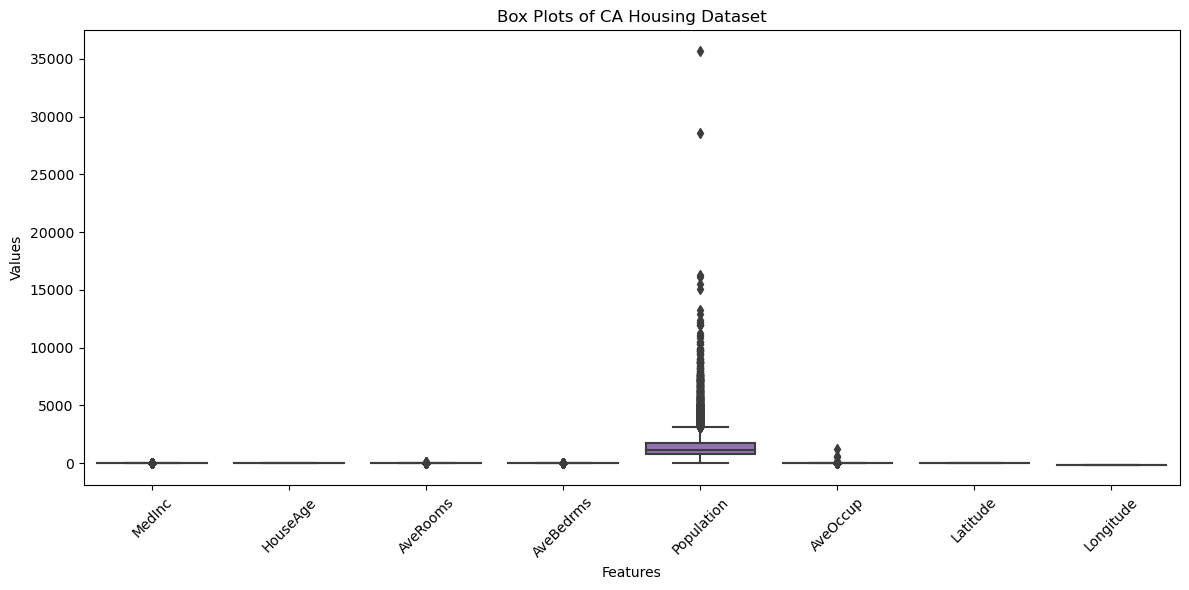

In [7]:
# Create box plots for each column
plt.figure(figsize=(12, 6))
sns.boxplot(data=housing_df)
plt.xticks(rotation=45)
plt.title('Box Plots of CA Housing Dataset')
plt.xlabel('Features')
plt.ylabel('Values')
plt.tight_layout()
plt.show()

In [8]:
# Display column-wise outliers
print("Column-wise Outliers:")
for column in housing_df.columns:
    column_outliers = housing_df[column][outliers[column]]
    if not column_outliers.empty:
        print(f"{column} - Outliers:", column_outliers)

# Display lower and higher cutoffs
print("\nLower Cutoffs:")
print(lower_cutoff)
print("\nUpper Cutoffs:")
print(upper_cutoff)

Column-wise Outliers:
MedInc - Outliers: 0         8.3252
1         8.3014
131      11.6017
134       8.2049
135       8.4010
          ...   
20426    10.0472
20427     8.6499
20428     8.7288
20436    12.5420
20503     8.2787
Name: MedInc, Length: 681, dtype: float64
AveRooms - Outliers: 73       1.714286
155      8.972868
511      8.928358
512      9.210227
514      9.122715
           ...   
20408    8.730038
20426    9.890756
20428    8.715842
20436    9.873315
20462    8.652174
Name: AveRooms, Length: 511, dtype: float64
AveBedrms - Outliers: 41       1.248996
57       1.372951
59       0.754386
61       1.260870
62       1.557377
           ...   
20423    1.505155
20608    1.273171
20620    0.854167
20621    1.573248
20636    1.315789
Name: AveBedrms, Length: 1424, dtype: float64
Population - Outliers: 95       3469.0
185      4367.0
283      4985.0
460      3337.0
485      3276.0
          ...  
20543    3717.0
20544    6330.0
20563    6837.0
20604    3265.0
20629    6912.0
Na